In [50]:
# Model definition
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasRegressor

from keras.datasets import boston_housing

from sklearn.preprocessing  import ( StandardScaler,)
from sklearn.model_selection import ( train_test_split,KFold, )

import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 

In [28]:
print(train_data.shape)
train_data[0:1]

(404, 13)


array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ]])

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [57]:
scaler = StandardScaler()
scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

#train_data, valid_data, train_targets, valid_targets = train_test_split(train_data, train_targets, test_size=0.1, random_state = 42)


In [9]:
seed = 7
model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=10, verbose=0)
results = cross_val_score(model, train_data, train_targets, cv=4, scoring='neg_mean_absolute_error')



array([-1.92379116, -2.46384105, -2.56268391, -2.44143348])

In [76]:
epochs = 300
history = model.fit(train_data,train_targets, epochs = epochs, batch_size = 10, validation_data= (valid_data, valid_targets))

Train on 404 samples, validate on 134 samples
Epoch 1/300
404/404 [==============================] - 0s 77us/step - loss: 7.5575 - mean_absolute_error: 1.3902 - val_loss: 16.9201 - val_mean_absolute_error: 2.5765
Epoch 2/300
404/404 [==============================] - 0s 133us/step - loss: 6.5418 - mean_absolute_error: 1.3190 - val_loss: 14.0340 - val_mean_absolute_error: 2.3118
Epoch 3/300
404/404 [==============================] - 0s 74us/step - loss: 5.7958 - mean_absolute_error: 1.3502 - val_loss: 13.5968 - val_mean_absolute_error: 2.2416
Epoch 4/300
404/404 [==============================] - 0s 116us/step - loss: 5.5653 - mean_absolute_error: 1.2971 - val_loss: 11.8510 - val_mean_absolute_error: 2.1349
Epoch 5/300
404/404 [==============================] - 0s 120us/step - loss: 5.1541 - mean_absolute_error: 1.3281 - val_loss: 10.8781 - val_mean_absolute_error: 2.0339
Epoch 6/300
404/404 [==============================] - 0s 77us/step - loss: 4.5641 - mean_absolute_error: 1.2748 - v

404/404 [==============================] - 0s 69us/step - loss: 2.2295 - mean_absolute_error: 1.0090 - val_loss: 3.1665 - val_mean_absolute_error: 1.1244
Epoch 50/300
404/404 [==============================] - 0s 116us/step - loss: 2.0758 - mean_absolute_error: 0.9545 - val_loss: 3.4370 - val_mean_absolute_error: 1.1765
Epoch 51/300
404/404 [==============================] - 0s 75us/step - loss: 2.0236 - mean_absolute_error: 0.9410 - val_loss: 3.6648 - val_mean_absolute_error: 1.3690
Epoch 52/300
404/404 [==============================] - 0s 77us/step - loss: 1.9520 - mean_absolute_error: 0.9544 - val_loss: 3.4612 - val_mean_absolute_error: 1.2885
Epoch 53/300
404/404 [==============================] - 0s 118us/step - loss: 2.1980 - mean_absolute_error: 0.9664 - val_loss: 4.1724 - val_mean_absolute_error: 1.3530
Epoch 54/300
404/404 [==============================] - 0s 222us/step - loss: 1.9909 - mean_absolute_error: 0.9696 - val_loss: 3.4647 - val_mean_absolute_error: 1.1508
Epoch 55

404/404 [==============================] - 0s 72us/step - loss: 1.4013 - mean_absolute_error: 0.8367 - val_loss: 1.9633 - val_mean_absolute_error: 0.9590
Epoch 99/300
404/404 [==============================] - 0s 91us/step - loss: 1.3879 - mean_absolute_error: 0.8350 - val_loss: 1.7583 - val_mean_absolute_error: 0.9681
Epoch 100/300
404/404 [==============================] - 0s 89us/step - loss: 1.3408 - mean_absolute_error: 0.8341 - val_loss: 2.3000 - val_mean_absolute_error: 1.1011
Epoch 101/300
404/404 [==============================] - 0s 96us/step - loss: 1.3545 - mean_absolute_error: 0.8474 - val_loss: 3.1043 - val_mean_absolute_error: 1.4137
Epoch 102/300
404/404 [==============================] - 0s 79us/step - loss: 1.2843 - mean_absolute_error: 0.8165 - val_loss: 1.9088 - val_mean_absolute_error: 0.9645
Epoch 103/300
404/404 [==============================] - 0s 77us/step - loss: 1.2970 - mean_absolute_error: 0.8466 - val_loss: 2.6139 - val_mean_absolute_error: 1.2407
Epoch 1

Epoch 147/300
404/404 [==============================] - 0s 91us/step - loss: 0.9084 - mean_absolute_error: 0.6881 - val_loss: 1.7200 - val_mean_absolute_error: 0.9720
Epoch 148/300
404/404 [==============================] - 0s 86us/step - loss: 0.9798 - mean_absolute_error: 0.7422 - val_loss: 1.3626 - val_mean_absolute_error: 0.8100
Epoch 149/300
404/404 [==============================] - 0s 81us/step - loss: 0.9305 - mean_absolute_error: 0.7141 - val_loss: 0.9449 - val_mean_absolute_error: 0.6767
Epoch 150/300
404/404 [==============================] - 0s 79us/step - loss: 0.8800 - mean_absolute_error: 0.7040 - val_loss: 1.0342 - val_mean_absolute_error: 0.7487
Epoch 151/300
404/404 [==============================] - 0s 81us/step - loss: 0.9742 - mean_absolute_error: 0.7213 - val_loss: 0.9243 - val_mean_absolute_error: 0.6945
Epoch 152/300
404/404 [==============================] - 0s 84us/step - loss: 0.9510 - mean_absolute_error: 0.6910 - val_loss: 2.2497 - val_mean_absolute_error:

Epoch 196/300
404/404 [==============================] - 0s 81us/step - loss: 0.7642 - mean_absolute_error: 0.6495 - val_loss: 1.0347 - val_mean_absolute_error: 0.7647
Epoch 197/300
404/404 [==============================] - 0s 101us/step - loss: 0.7495 - mean_absolute_error: 0.6730 - val_loss: 1.1868 - val_mean_absolute_error: 0.7865
Epoch 198/300
404/404 [==============================] - 0s 106us/step - loss: 0.7828 - mean_absolute_error: 0.6750 - val_loss: 1.1501 - val_mean_absolute_error: 0.7812
Epoch 199/300
404/404 [==============================] - 0s 128us/step - loss: 0.7464 - mean_absolute_error: 0.6276 - val_loss: 1.4755 - val_mean_absolute_error: 0.9336
Epoch 200/300
404/404 [==============================] - 0s 99us/step - loss: 0.8224 - mean_absolute_error: 0.6748 - val_loss: 0.7449 - val_mean_absolute_error: 0.5911
Epoch 201/300
404/404 [==============================] - 0s 109us/step - loss: 0.7557 - mean_absolute_error: 0.6466 - val_loss: 1.3902 - val_mean_absolute_er

Epoch 245/300
404/404 [==============================] - 0s 91us/step - loss: 0.6440 - mean_absolute_error: 0.6052 - val_loss: 2.9314 - val_mean_absolute_error: 1.3149
Epoch 246/300
404/404 [==============================] - 0s 89us/step - loss: 0.7518 - mean_absolute_error: 0.6459 - val_loss: 0.8849 - val_mean_absolute_error: 0.7091
Epoch 247/300
404/404 [==============================] - 0s 99us/step - loss: 0.6052 - mean_absolute_error: 0.5881 - val_loss: 0.5267 - val_mean_absolute_error: 0.5215
Epoch 248/300
404/404 [==============================] - 0s 91us/step - loss: 0.7552 - mean_absolute_error: 0.6543 - val_loss: 0.9375 - val_mean_absolute_error: 0.7284
Epoch 249/300
404/404 [==============================] - 0s 99us/step - loss: 0.6189 - mean_absolute_error: 0.5898 - val_loss: 1.1068 - val_mean_absolute_error: 0.7870
Epoch 250/300
404/404 [==============================] - 0s 99us/step - loss: 0.6807 - mean_absolute_error: 0.6154 - val_loss: 0.4470 - val_mean_absolute_error:

Epoch 294/300
404/404 [==============================] - 0s 91us/step - loss: 0.6475 - mean_absolute_error: 0.6045 - val_loss: 0.6945 - val_mean_absolute_error: 0.5949
Epoch 295/300
404/404 [==============================] - 0s 91us/step - loss: 0.5948 - mean_absolute_error: 0.5741 - val_loss: 0.3416 - val_mean_absolute_error: 0.4038
Epoch 296/300
404/404 [==============================] - 0s 94us/step - loss: 0.5337 - mean_absolute_error: 0.5468 - val_loss: 1.8893 - val_mean_absolute_error: 1.0706
Epoch 297/300
404/404 [==============================] - 0s 94us/step - loss: 0.5832 - mean_absolute_error: 0.5809 - val_loss: 0.6107 - val_mean_absolute_error: 0.5994
Epoch 298/300
404/404 [==============================] - 0s 91us/step - loss: 0.6132 - mean_absolute_error: 0.5488 - val_loss: 0.5916 - val_mean_absolute_error: 0.5515
Epoch 299/300
404/404 [==============================] - 0s 91us/step - loss: 0.5920 - mean_absolute_error: 0.5538 - val_loss: 0.5614 - val_mean_absolute_error:

In [17]:
print(history.history["loss"])

[425.40616645435296, 167.14599518728727, 58.37013275316446, 31.0138735676756, 21.94356401604001, 18.742831454418674, 16.501670044247465, 14.696336342556641, 13.979323368261356, 12.92596703708762, 12.33240691447022, 11.755028460285452, 11.21067376434803, 11.131499485214158, 10.647685124142335, 10.286920631285941, 10.233806140352003, 9.730642396624726, 9.623588671188543, 9.756265421314994]


Text(0, 0.5, 'loss')

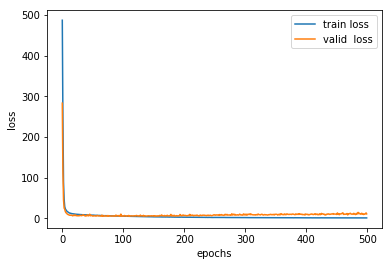

In [42]:
plt.plot(range(0,epochs),history.history["loss"], label = "train loss")
plt.plot(range(0,epochs),history.history["val_loss"],label = "valid  loss")
#plt.plot(epochs,history.history["mae"],label = "mae")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

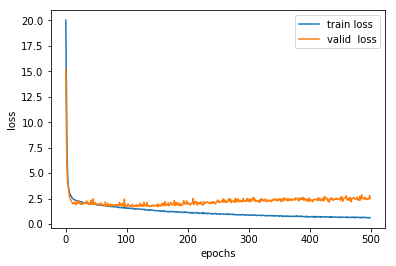

In [43]:
plt.plot(range(0,epochs),history.history["mean_absolute_error"], label = "train loss")
plt.plot(range(0,epochs),history.history["val_mean_absolute_error"],label = "valid  loss")
#plt.plot(epochs,history.history["mae"],label = "mae")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")

Train on 269 samples, validate on 135 samples
Epoch 1/300
269/269 [==============================] - 1s 2ms/step - loss: 516.1415 - mean_absolute_error: 20.7778 - val_loss: 448.3088 - val_mean_absolute_error: 18.6933
Epoch 2/300
269/269 [==============================] - 0s 88us/step - loss: 360.8164 - mean_absolute_error: 16.6294 - val_loss: 272.2146 - val_mean_absolute_error: 13.8019
Epoch 3/300
269/269 [==============================] - 0s 73us/step - loss: 191.3598 - mean_absolute_error: 11.4344 - val_loss: 114.1289 - val_mean_absolute_error: 8.2337
Epoch 4/300
269/269 [==============================] - 0s 58us/step - loss: 86.6792 - mean_absolute_error: 6.8935 - val_loss: 56.3511 - val_mean_absolute_error: 5.5693
Epoch 5/300
269/269 [==============================] - 0s 116us/step - loss: 48.0323 - mean_absolute_error: 5.0216 - val_loss: 35.4689 - val_mean_absolute_error: 4.3456
Epoch 6/300
269/269 [==============================] - 0s 168us/step - loss: 32.8265 - mean_absolute_er

269/269 [==============================] - 0s 116us/step - loss: 8.0835 - mean_absolute_error: 1.9485 - val_loss: 8.5280 - val_mean_absolute_error: 2.2170
Epoch 50/300
269/269 [==============================] - 0s 116us/step - loss: 8.1553 - mean_absolute_error: 1.9757 - val_loss: 8.4757 - val_mean_absolute_error: 2.2608
Epoch 51/300
269/269 [==============================] - 0s 82us/step - loss: 7.8910 - mean_absolute_error: 1.9216 - val_loss: 8.8166 - val_mean_absolute_error: 2.3138
Epoch 52/300
269/269 [==============================] - 0s 116us/step - loss: 7.7573 - mean_absolute_error: 1.9563 - val_loss: 8.5594 - val_mean_absolute_error: 2.2637
Epoch 53/300
269/269 [==============================] - 0s 145us/step - loss: 7.5033 - mean_absolute_error: 1.9085 - val_loss: 8.9203 - val_mean_absolute_error: 2.3510
Epoch 54/300
269/269 [==============================] - 0s 112us/step - loss: 7.6819 - mean_absolute_error: 1.9202 - val_loss: 8.8749 - val_mean_absolute_error: 2.3265
Epoch 

Epoch 98/300
269/269 [==============================] - 0s 116us/step - loss: 5.1732 - mean_absolute_error: 1.5649 - val_loss: 8.8041 - val_mean_absolute_error: 2.2891
Epoch 99/300
269/269 [==============================] - 0s 133us/step - loss: 5.1131 - mean_absolute_error: 1.5688 - val_loss: 8.4109 - val_mean_absolute_error: 2.2792
Epoch 100/300
269/269 [==============================] - 0s 58us/step - loss: 5.0049 - mean_absolute_error: 1.5366 - val_loss: 8.0990 - val_mean_absolute_error: 2.1950
Epoch 101/300
269/269 [==============================] - 0s 58us/step - loss: 4.9234 - mean_absolute_error: 1.5598 - val_loss: 8.8395 - val_mean_absolute_error: 2.2705
Epoch 102/300
269/269 [==============================] - 0s 116us/step - loss: 4.9377 - mean_absolute_error: 1.5808 - val_loss: 8.3087 - val_mean_absolute_error: 2.1651
Epoch 103/300
269/269 [==============================] - 0s 140us/step - loss: 5.0692 - mean_absolute_error: 1.5541 - val_loss: 7.9173 - val_mean_absolute_erro

269/269 [==============================] - 0s 116us/step - loss: 3.6202 - mean_absolute_error: 1.2950 - val_loss: 8.2738 - val_mean_absolute_error: 2.1267
Epoch 147/300
269/269 [==============================] - 0s 82us/step - loss: 3.5488 - mean_absolute_error: 1.3244 - val_loss: 8.4786 - val_mean_absolute_error: 2.1727
Epoch 148/300
269/269 [==============================] - 0s 130us/step - loss: 3.7428 - mean_absolute_error: 1.3593 - val_loss: 9.0174 - val_mean_absolute_error: 2.2259
Epoch 149/300
269/269 [==============================] - 0s 75us/step - loss: 3.6626 - mean_absolute_error: 1.3276 - val_loss: 8.3100 - val_mean_absolute_error: 2.1349
Epoch 150/300
269/269 [==============================] - 0s 106us/step - loss: 3.5096 - mean_absolute_error: 1.3141 - val_loss: 9.1362 - val_mean_absolute_error: 2.3309
Epoch 151/300
269/269 [==============================] - 0s 58us/step - loss: 3.3883 - mean_absolute_error: 1.2723 - val_loss: 8.3420 - val_mean_absolute_error: 2.1164
Epo

269/269 [==============================] - 0s 140us/step - loss: 2.6225 - mean_absolute_error: 1.1628 - val_loss: 8.6267 - val_mean_absolute_error: 2.1323
Epoch 195/300
269/269 [==============================] - 0s 58us/step - loss: 2.7481 - mean_absolute_error: 1.1429 - val_loss: 10.0242 - val_mean_absolute_error: 2.2438
Epoch 196/300
269/269 [==============================] - 0s 116us/step - loss: 2.7202 - mean_absolute_error: 1.1269 - val_loss: 9.9575 - val_mean_absolute_error: 2.2486
Epoch 197/300
269/269 [==============================] - 0s 116us/step - loss: 2.8478 - mean_absolute_error: 1.1834 - val_loss: 8.7282 - val_mean_absolute_error: 2.0977
Epoch 198/300
269/269 [==============================] - 0s 82us/step - loss: 2.5819 - mean_absolute_error: 1.1621 - val_loss: 9.7146 - val_mean_absolute_error: 2.2187
Epoch 199/300
269/269 [==============================] - 0s 116us/step - loss: 2.7272 - mean_absolute_error: 1.1986 - val_loss: 10.1273 - val_mean_absolute_error: 2.3231


269/269 [==============================] - 0s 58us/step - loss: 1.9697 - mean_absolute_error: 1.0046 - val_loss: 9.9751 - val_mean_absolute_error: 2.2010
Epoch 243/300
269/269 [==============================] - 0s 116us/step - loss: 1.9255 - mean_absolute_error: 1.0222 - val_loss: 10.2576 - val_mean_absolute_error: 2.1779
Epoch 244/300
269/269 [==============================] - 0s 82us/step - loss: 1.9854 - mean_absolute_error: 0.9997 - val_loss: 10.6572 - val_mean_absolute_error: 2.2417
Epoch 245/300
269/269 [==============================] - 0s 93us/step - loss: 1.8960 - mean_absolute_error: 0.9811 - val_loss: 10.9181 - val_mean_absolute_error: 2.2551
Epoch 246/300
269/269 [==============================] - 0s 116us/step - loss: 1.8869 - mean_absolute_error: 0.9754 - val_loss: 10.0976 - val_mean_absolute_error: 2.2701
Epoch 247/300
269/269 [==============================] - 0s 116us/step - loss: 1.8375 - mean_absolute_error: 1.0147 - val_loss: 10.8177 - val_mean_absolute_error: 2.247

269/269 [==============================] - 0s 116us/step - loss: 1.6027 - mean_absolute_error: 0.9212 - val_loss: 11.0391 - val_mean_absolute_error: 2.2724
Epoch 291/300
269/269 [==============================] - 0s 82us/step - loss: 1.4157 - mean_absolute_error: 0.8942 - val_loss: 11.4092 - val_mean_absolute_error: 2.3077
Epoch 292/300
269/269 [==============================] - 0s 116us/step - loss: 1.5089 - mean_absolute_error: 0.8769 - val_loss: 12.4947 - val_mean_absolute_error: 2.4497
Epoch 293/300
269/269 [==============================] - 0s 116us/step - loss: 1.5577 - mean_absolute_error: 0.9005 - val_loss: 12.2883 - val_mean_absolute_error: 2.3689
Epoch 294/300
269/269 [==============================] - 0s 144us/step - loss: 1.5310 - mean_absolute_error: 0.8904 - val_loss: 11.4250 - val_mean_absolute_error: 2.3431
Epoch 295/300
269/269 [==============================] - 0s 56us/step - loss: 1.4533 - mean_absolute_error: 0.8783 - val_loss: 10.3555 - val_mean_absolute_error: 2.1

269/269 [==============================] - 0s 116us/step - loss: 8.2611 - mean_absolute_error: 1.9820 - val_loss: 11.3308 - val_mean_absolute_error: 2.5216
Epoch 39/300
269/269 [==============================] - 0s 58us/step - loss: 7.9016 - mean_absolute_error: 1.9615 - val_loss: 11.9600 - val_mean_absolute_error: 2.6384
Epoch 40/300
269/269 [==============================] - 0s 82us/step - loss: 7.8898 - mean_absolute_error: 1.9394 - val_loss: 11.2172 - val_mean_absolute_error: 2.5221
Epoch 41/300
269/269 [==============================] - 0s 116us/step - loss: 7.4804 - mean_absolute_error: 1.9105 - val_loss: 11.8041 - val_mean_absolute_error: 2.6000
Epoch 42/300
269/269 [==============================] - 0s 116us/step - loss: 7.5854 - mean_absolute_error: 1.9055 - val_loss: 11.8255 - val_mean_absolute_error: 2.5819
Epoch 43/300
269/269 [==============================] - 0s 82us/step - loss: 7.3399 - mean_absolute_error: 1.8617 - val_loss: 11.5013 - val_mean_absolute_error: 2.5762
Ep

269/269 [==============================] - 0s 85us/step - loss: 4.9371 - mean_absolute_error: 1.5591 - val_loss: 11.4478 - val_mean_absolute_error: 2.4921
Epoch 87/300
269/269 [==============================] - 0s 116us/step - loss: 4.7288 - mean_absolute_error: 1.4842 - val_loss: 10.8785 - val_mean_absolute_error: 2.4681
Epoch 88/300
269/269 [==============================] - 0s 146us/step - loss: 4.8326 - mean_absolute_error: 1.5328 - val_loss: 11.1085 - val_mean_absolute_error: 2.4885
Epoch 89/300
269/269 [==============================] - 0s 58us/step - loss: 4.8322 - mean_absolute_error: 1.5233 - val_loss: 11.0313 - val_mean_absolute_error: 2.4642
Epoch 90/300
269/269 [==============================] - 0s 116us/step - loss: 5.0225 - mean_absolute_error: 1.5376 - val_loss: 11.8473 - val_mean_absolute_error: 2.5728
Epoch 91/300
269/269 [==============================] - 0s 116us/step - loss: 4.6082 - mean_absolute_error: 1.4936 - val_loss: 10.8131 - val_mean_absolute_error: 2.4388
E

269/269 [==============================] - 0s 116us/step - loss: 3.0769 - mean_absolute_error: 1.2429 - val_loss: 10.7006 - val_mean_absolute_error: 2.4236
Epoch 135/300
269/269 [==============================] - 0s 116us/step - loss: 2.8984 - mean_absolute_error: 1.1943 - val_loss: 12.7053 - val_mean_absolute_error: 2.6478
Epoch 136/300
269/269 [==============================] - 0s 116us/step - loss: 2.9117 - mean_absolute_error: 1.2273 - val_loss: 12.1875 - val_mean_absolute_error: 2.5889
Epoch 137/300
269/269 [==============================] - 0s 58us/step - loss: 2.6739 - mean_absolute_error: 1.1310 - val_loss: 11.9988 - val_mean_absolute_error: 2.5831
Epoch 138/300
269/269 [==============================] - 0s 116us/step - loss: 2.8773 - mean_absolute_error: 1.2308 - val_loss: 10.5312 - val_mean_absolute_error: 2.4029
Epoch 139/300
269/269 [==============================] - 0s 82us/step - loss: 2.7632 - mean_absolute_error: 1.2292 - val_loss: 14.5228 - val_mean_absolute_error: 2.8

269/269 [==============================] - 0s 82us/step - loss: 2.0313 - mean_absolute_error: 1.0340 - val_loss: 11.6560 - val_mean_absolute_error: 2.5263
Epoch 183/300
269/269 [==============================] - 0s 116us/step - loss: 1.8593 - mean_absolute_error: 0.9725 - val_loss: 12.6750 - val_mean_absolute_error: 2.6436
Epoch 184/300
269/269 [==============================] - 0s 58us/step - loss: 1.9657 - mean_absolute_error: 0.9861 - val_loss: 12.5842 - val_mean_absolute_error: 2.6673
Epoch 185/300
269/269 [==============================] - 0s 140us/step - loss: 1.8986 - mean_absolute_error: 0.9775 - val_loss: 10.8781 - val_mean_absolute_error: 2.4386
Epoch 186/300
269/269 [==============================] - 0s 58us/step - loss: 1.8059 - mean_absolute_error: 0.9428 - val_loss: 11.8961 - val_mean_absolute_error: 2.5483
Epoch 187/300
269/269 [==============================] - 0s 116us/step - loss: 1.7755 - mean_absolute_error: 0.9544 - val_loss: 11.5664 - val_mean_absolute_error: 2.53

269/269 [==============================] - 0s 116us/step - loss: 1.4827 - mean_absolute_error: 0.8528 - val_loss: 12.0493 - val_mean_absolute_error: 2.5374
Epoch 231/300
269/269 [==============================] - 0s 58us/step - loss: 1.3067 - mean_absolute_error: 0.8233 - val_loss: 11.8510 - val_mean_absolute_error: 2.5017
Epoch 232/300
269/269 [==============================] - 0s 58us/step - loss: 1.3464 - mean_absolute_error: 0.8320 - val_loss: 10.5460 - val_mean_absolute_error: 2.3454
Epoch 233/300
269/269 [==============================] - 0s 116us/step - loss: 1.4191 - mean_absolute_error: 0.8660 - val_loss: 11.4069 - val_mean_absolute_error: 2.4805
Epoch 234/300
269/269 [==============================] - 0s 116us/step - loss: 1.3776 - mean_absolute_error: 0.8279 - val_loss: 11.2230 - val_mean_absolute_error: 2.4718
Epoch 235/300
269/269 [==============================] - 0s 82us/step - loss: 1.3731 - mean_absolute_error: 0.8589 - val_loss: 11.4786 - val_mean_absolute_error: 2.45

269/269 [==============================] - 0s 58us/step - loss: 0.9497 - mean_absolute_error: 0.7150 - val_loss: 10.4760 - val_mean_absolute_error: 2.3153
Epoch 279/300
269/269 [==============================] - 0s 140us/step - loss: 1.0959 - mean_absolute_error: 0.7735 - val_loss: 12.3658 - val_mean_absolute_error: 2.5910
Epoch 280/300
269/269 [==============================] - 0s 58us/step - loss: 1.1052 - mean_absolute_error: 0.7409 - val_loss: 10.1925 - val_mean_absolute_error: 2.3018
Epoch 281/300
269/269 [==============================] - 0s 116us/step - loss: 1.0432 - mean_absolute_error: 0.7367 - val_loss: 11.0001 - val_mean_absolute_error: 2.4430
Epoch 282/300
269/269 [==============================] - 0s 116us/step - loss: 1.0553 - mean_absolute_error: 0.7449 - val_loss: 11.4727 - val_mean_absolute_error: 2.4914
Epoch 283/300
269/269 [==============================] - 0s 82us/step - loss: 0.9670 - mean_absolute_error: 0.7062 - val_loss: 10.7961 - val_mean_absolute_error: 2.40

270/270 [==============================] - 0s 82us/step - loss: 7.7815 - mean_absolute_error: 2.0137 - val_loss: 17.7198 - val_mean_absolute_error: 2.6619
Epoch 27/300
270/270 [==============================] - 0s 116us/step - loss: 7.7436 - mean_absolute_error: 2.0536 - val_loss: 17.4618 - val_mean_absolute_error: 2.6956
Epoch 28/300
270/270 [==============================] - 0s 116us/step - loss: 7.2602 - mean_absolute_error: 1.9910 - val_loss: 18.2137 - val_mean_absolute_error: 2.7529
Epoch 29/300
270/270 [==============================] - 0s 82us/step - loss: 7.3158 - mean_absolute_error: 1.9824 - val_loss: 18.5573 - val_mean_absolute_error: 2.8492
Epoch 30/300
270/270 [==============================] - 0s 116us/step - loss: 7.1982 - mean_absolute_error: 1.9233 - val_loss: 16.5101 - val_mean_absolute_error: 2.5789
Epoch 31/300
270/270 [==============================] - 0s 58us/step - loss: 6.9963 - mean_absolute_error: 1.9528 - val_loss: 17.9675 - val_mean_absolute_error: 2.7783
Ep

Epoch 75/300
270/270 [==============================] - 0s 116us/step - loss: 4.5695 - mean_absolute_error: 1.4789 - val_loss: 15.9004 - val_mean_absolute_error: 2.5799
Epoch 76/300
270/270 [==============================] - 0s 116us/step - loss: 4.5083 - mean_absolute_error: 1.4790 - val_loss: 15.7300 - val_mean_absolute_error: 2.5436
Epoch 77/300
270/270 [==============================] - 0s 82us/step - loss: 4.3129 - mean_absolute_error: 1.4855 - val_loss: 15.7968 - val_mean_absolute_error: 2.5707
Epoch 78/300
270/270 [==============================] - 0s 58us/step - loss: 4.5263 - mean_absolute_error: 1.5182 - val_loss: 15.7139 - val_mean_absolute_error: 2.5601
Epoch 79/300
270/270 [==============================] - 0s 116us/step - loss: 4.3569 - mean_absolute_error: 1.4753 - val_loss: 15.6396 - val_mean_absolute_error: 2.5671
Epoch 80/300
270/270 [==============================] - 0s 131us/step - loss: 4.3193 - mean_absolute_error: 1.4641 - val_loss: 15.6945 - val_mean_absolute_er

270/270 [==============================] - 0s 116us/step - loss: 3.0049 - mean_absolute_error: 1.2384 - val_loss: 15.4789 - val_mean_absolute_error: 2.5411
Epoch 124/300
270/270 [==============================] - 0s 82us/step - loss: 2.9940 - mean_absolute_error: 1.2193 - val_loss: 14.6864 - val_mean_absolute_error: 2.4513
Epoch 125/300
270/270 [==============================] - 0s 58us/step - loss: 2.8832 - mean_absolute_error: 1.2090 - val_loss: 14.5838 - val_mean_absolute_error: 2.4016
Epoch 126/300
270/270 [==============================] - 0s 116us/step - loss: 2.8300 - mean_absolute_error: 1.1872 - val_loss: 15.0190 - val_mean_absolute_error: 2.4426
Epoch 127/300
270/270 [==============================] - 0s 116us/step - loss: 2.9958 - mean_absolute_error: 1.2394 - val_loss: 15.4880 - val_mean_absolute_error: 2.5461
Epoch 128/300
270/270 [==============================] - 0s 82us/step - loss: 2.8243 - mean_absolute_error: 1.1867 - val_loss: 15.0343 - val_mean_absolute_error: 2.46

270/270 [==============================] - 0s 116us/step - loss: 2.1764 - mean_absolute_error: 1.0564 - val_loss: 15.5253 - val_mean_absolute_error: 2.5570
Epoch 172/300
270/270 [==============================] - 0s 58us/step - loss: 2.2947 - mean_absolute_error: 1.0534 - val_loss: 14.9276 - val_mean_absolute_error: 2.4490
Epoch 173/300
270/270 [==============================] - 0s 116us/step - loss: 2.1877 - mean_absolute_error: 1.0722 - val_loss: 15.5205 - val_mean_absolute_error: 2.5192
Epoch 174/300
270/270 [==============================] - 0s 82us/step - loss: 1.9303 - mean_absolute_error: 0.9826 - val_loss: 16.1578 - val_mean_absolute_error: 2.5912
Epoch 175/300
270/270 [==============================] - 0s 116us/step - loss: 2.2252 - mean_absolute_error: 1.0766 - val_loss: 16.4174 - val_mean_absolute_error: 2.7657
Epoch 176/300
270/270 [==============================] - 0s 116us/step - loss: 2.1216 - mean_absolute_error: 1.0349 - val_loss: 14.9157 - val_mean_absolute_error: 2.4

270/270 [==============================] - 0s 82us/step - loss: 1.5578 - mean_absolute_error: 0.8957 - val_loss: 15.5128 - val_mean_absolute_error: 2.4800
Epoch 220/300
270/270 [==============================] - 0s 116us/step - loss: 1.5766 - mean_absolute_error: 0.8831 - val_loss: 15.7372 - val_mean_absolute_error: 2.4995
Epoch 221/300
270/270 [==============================] - 0s 116us/step - loss: 1.6750 - mean_absolute_error: 0.9145 - val_loss: 16.0298 - val_mean_absolute_error: 2.5745
Epoch 222/300
270/270 [==============================] - 0s 58us/step - loss: 1.5030 - mean_absolute_error: 0.8831 - val_loss: 16.5524 - val_mean_absolute_error: 2.6743
Epoch 223/300
270/270 [==============================] - 0s 82us/step - loss: 1.6094 - mean_absolute_error: 0.8705 - val_loss: 15.5764 - val_mean_absolute_error: 2.4985
Epoch 224/300
270/270 [==============================] - 0s 116us/step - loss: 1.5991 - mean_absolute_error: 0.9142 - val_loss: 15.7831 - val_mean_absolute_error: 2.50

270/270 [==============================] - 0s 116us/step - loss: 1.2944 - mean_absolute_error: 0.8057 - val_loss: 16.4497 - val_mean_absolute_error: 2.5771
Epoch 268/300
270/270 [==============================] - 0s 82us/step - loss: 1.2253 - mean_absolute_error: 0.7681 - val_loss: 16.9198 - val_mean_absolute_error: 2.6187
Epoch 269/300
270/270 [==============================] - 0s 116us/step - loss: 1.2566 - mean_absolute_error: 0.7752 - val_loss: 16.1399 - val_mean_absolute_error: 2.5283
Epoch 270/300
270/270 [==============================] - 0s 116us/step - loss: 1.1197 - mean_absolute_error: 0.7639 - val_loss: 16.2896 - val_mean_absolute_error: 2.5542
Epoch 271/300
270/270 [==============================] - 0s 58us/step - loss: 1.2357 - mean_absolute_error: 0.7960 - val_loss: 16.6431 - val_mean_absolute_error: 2.6540
Epoch 272/300
270/270 [==============================] - 0s 140us/step - loss: 1.2194 - mean_absolute_error: 0.7814 - val_loss: 16.1095 - val_mean_absolute_error: 2.5

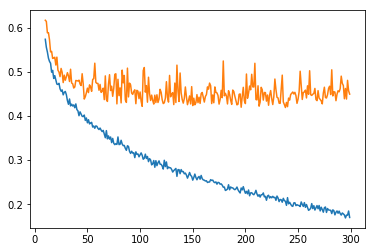

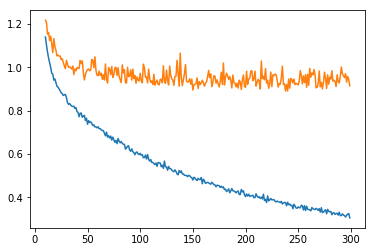

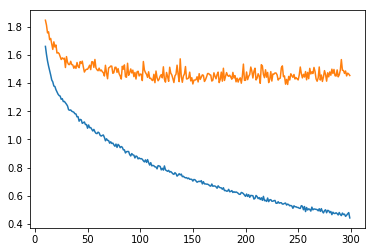

In [77]:
kf = KFold(n_splits=5)
mse_avg = np.zeros(epochs) 
val_mse_avg = np.zeros(epochs) 
for train_index , valid_index in kf.split(train_data):
    
    part_train_data = train_data[train_index]
    part_train_targets = train_targets[train_index]
    valid_data = train_data[valid_index]
    valid_targets = train_targets[valid_index]

    model = build_model()
    history = model.fit(part_train_data,part_train_targets, epochs = epochs, batch_size = 10, validation_data= (valid_data, valid_targets))
    
    mse_avg = mse_avg + 0.2 * np.array(history.history["mean_absolute_error"])
    val_mse_avg = val_mse_avg + 0.2 * np.array(history.history["val_mean_absolute_error"])
    
    plt.figure()
    plt.plot(range(10,epochs),mse_avg[10:], label = "train loss")
    plt.plot(range(10,epochs),val_mse_avg[10:],label = "valid  loss")
    


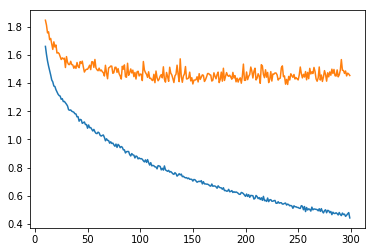

In [78]:
#print(np.array(history.history["mean_absolute_error"])[10:20])
#print(0.2 * np.array(history.history["mean_absolute_error"])[10:20])

#plt.plot(range(10,epochs),np.array(history.history["mean_absolute_error"])[10:], label = "train loss")
#plt.plot(range(10,epochs),np.array(history.history["val_mean_absolute_error"])[10:],label = "valid  loss")

plt.plot(range(10,epochs),mse_avg[10:], label = "train loss")
plt.plot(range(10,epochs),val_mse_avg[10:],label = "valid  loss")